In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def smooth(scalars, weight=0.9):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value
        
    return smoothed

In [3]:
p_parent = '/Users/harveyaa/Documents/masters/neuropsych_mtl/MTL/results/sex'
p_out_parent = '/Users/harveyaa/Documents/masters/neuropsych_mtl/MTL/results/sex'

In [4]:
sites = ['ADHD1',
        'ADHD3',
        'ADHD5',
        'ADHD6',
        'HSJ',
        'Svip1',
        'Svip2',
        'SZ3',
        'SZ6',
        'UCLA_CB',
        'UCLA_DS1',
        'UKBB11025',
        'UKBB11026',
        'UKBB11027']

In [5]:
sns.set_style('whitegrid')

## Single Task

In [8]:
res_single = {}
for site in sites:
    p = os.path.join(p_parent,f'{site}')
    folds = []
    for i in range(5):
        p_fold = os.path.join(p,f'fold_{i}')
        file = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0]
        df = pd.read_csv(os.path.join(p,f'fold_{i}',file),index_col=0,header=[0,1])[site]
        folds.append(df)
    res_single[site] = folds

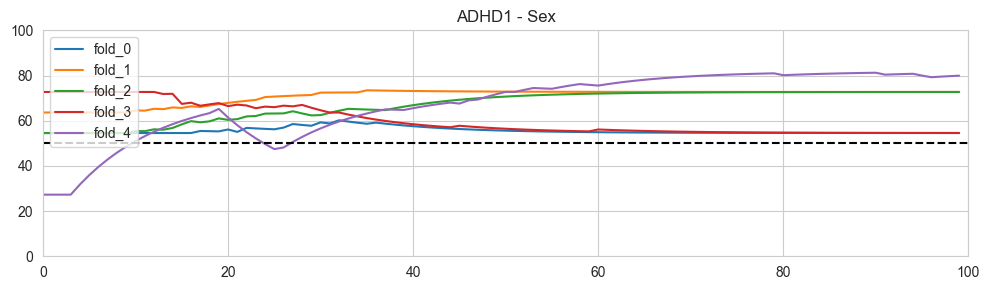

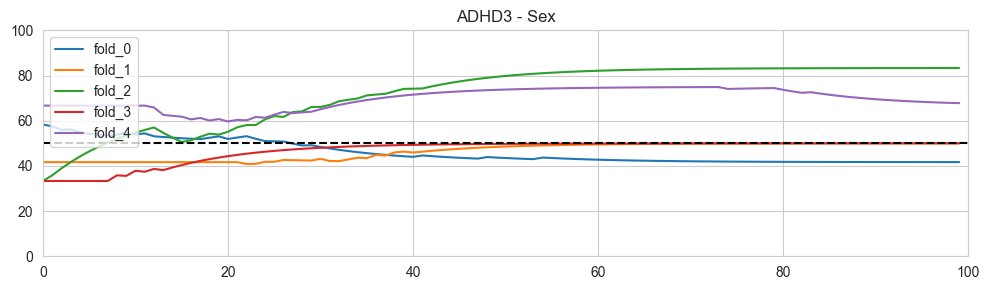

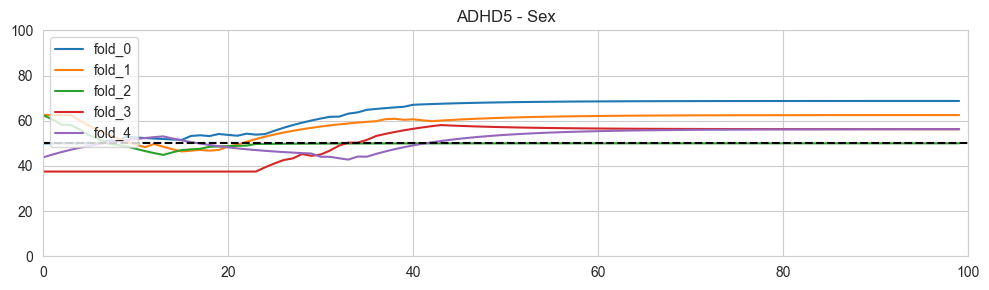

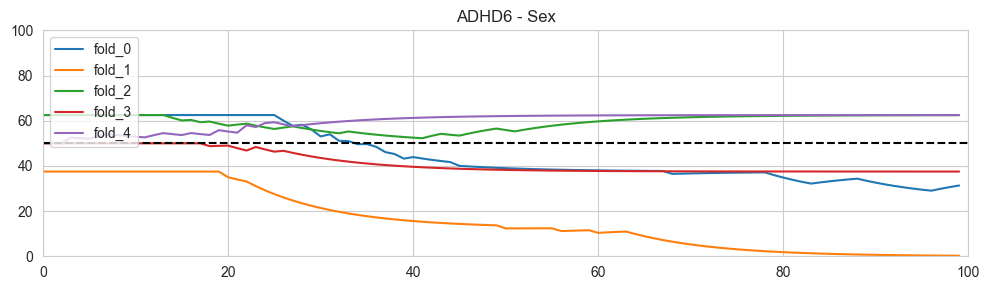

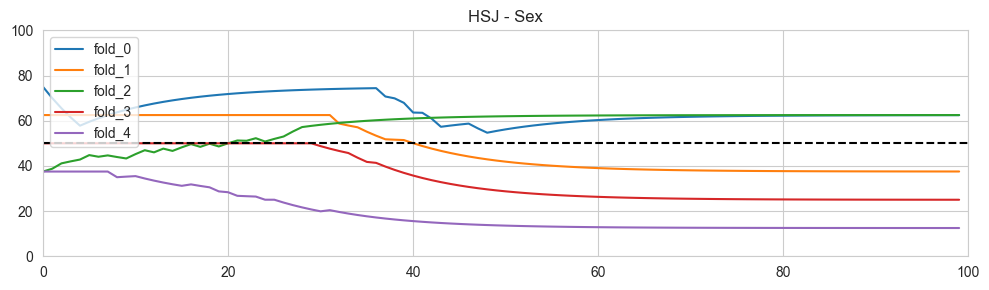

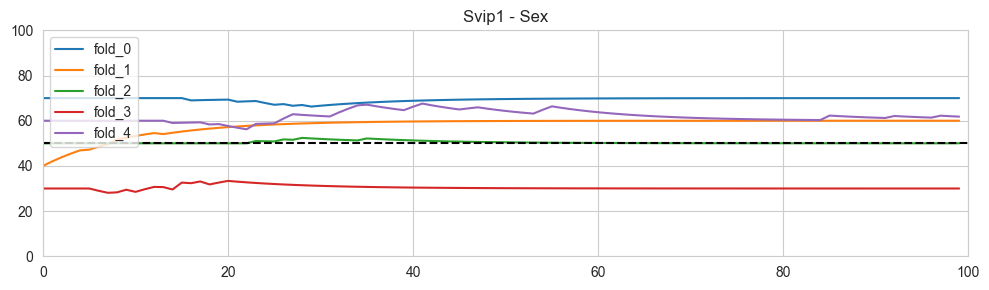

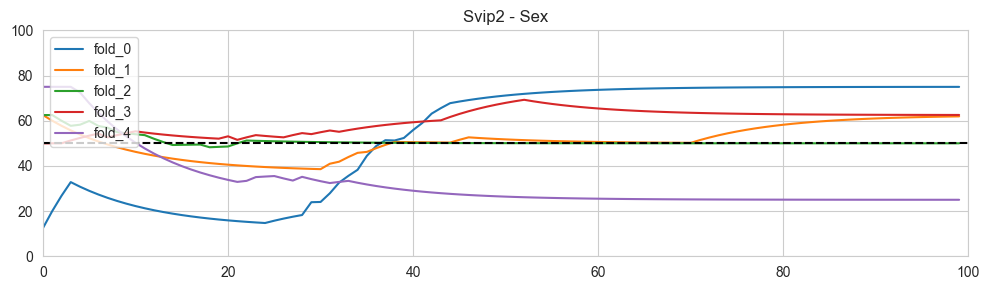

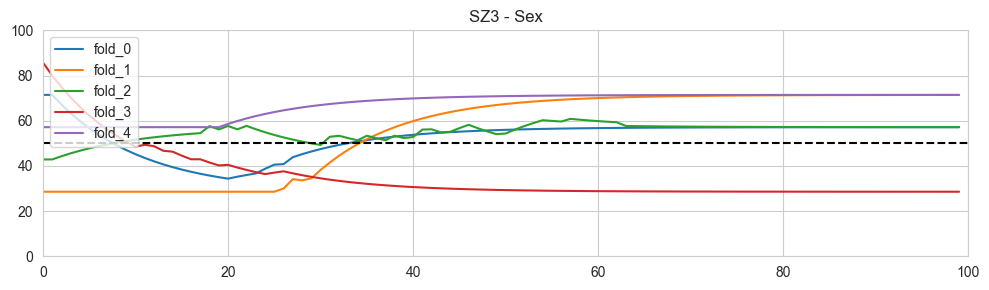

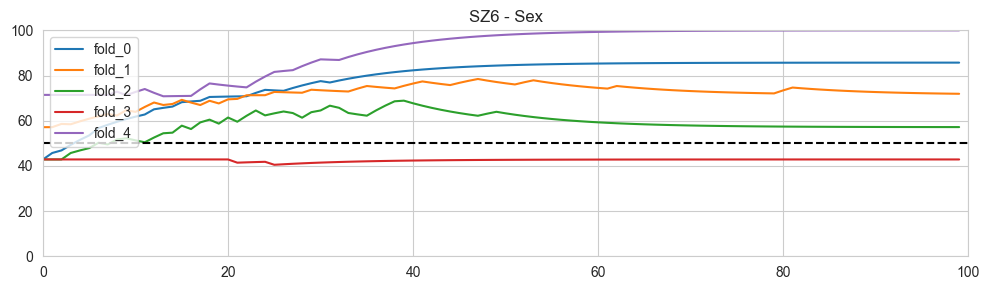

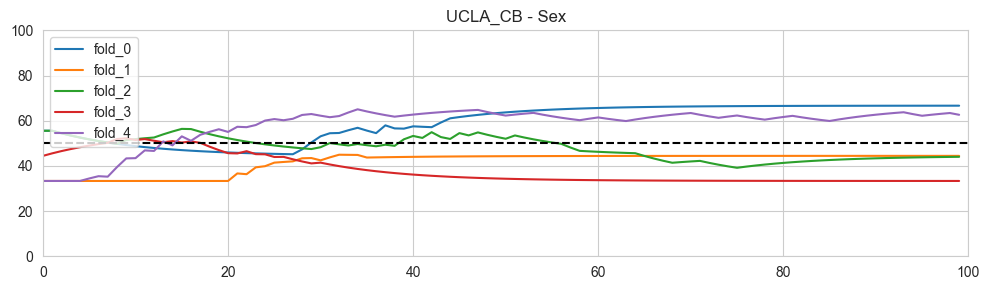

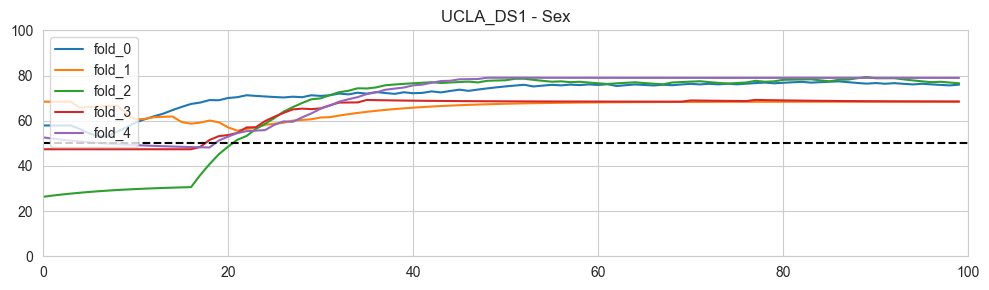

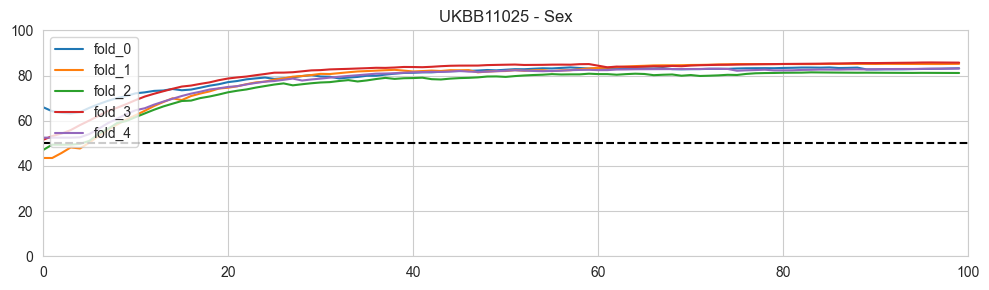

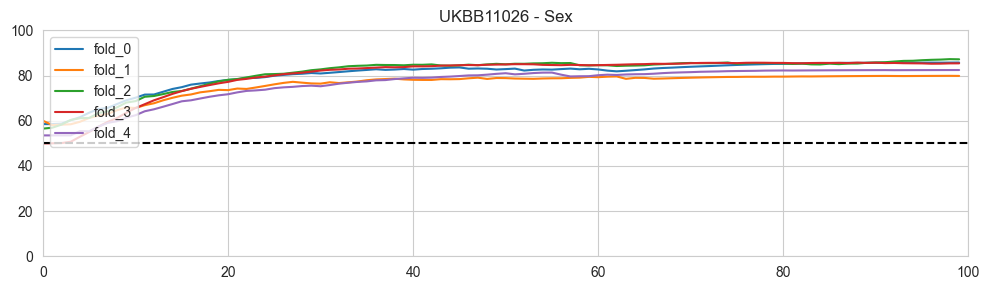

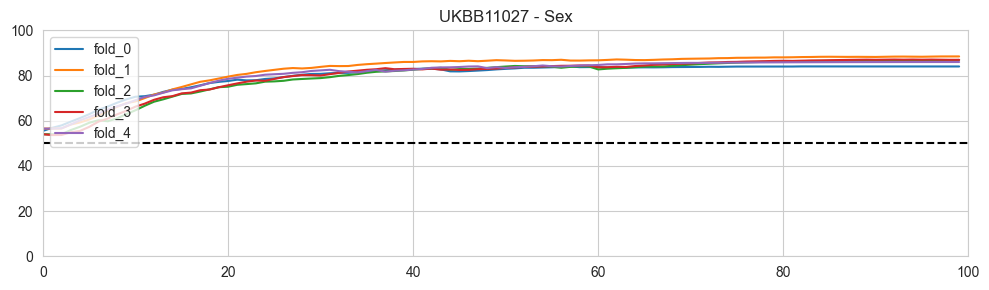

In [12]:
for site in res_single:
    fig,ax = plt.subplots(figsize=(10,3))
    plt.ylim(0,100)
    plt.xlim(0,100)
    for i,df in enumerate(res_single[site]):
        sns.lineplot(x=df.index,y=smooth(df['Accuracy/test']),data=df,label=f'fold_{i}')
    plt.title(f'{site} - Sex')
    plt.hlines(50,-5,105,ls='--',color='black')
    plt.legend(loc="upper left")
    plt.tight_layout()
    plt.savefig(os.path.join(p_out_parent,f'figures/{site}.png'),dpi=300)
    plt.show()

## Multi-Task

In [13]:
n_folds = 5

p = os.path.join(p_parent,'all')
folds = []
for i in range(n_folds):
    p_fold = os.path.join(p,f'fold_{i}')
    file = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0]
    df = pd.read_csv(os.path.join(p,f'fold_{i}',file),index_col=0,header=[0,1])
    folds.append(df)

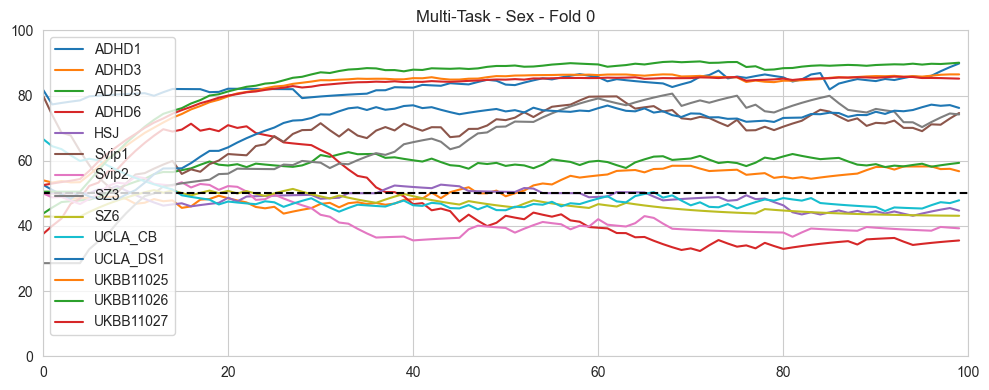

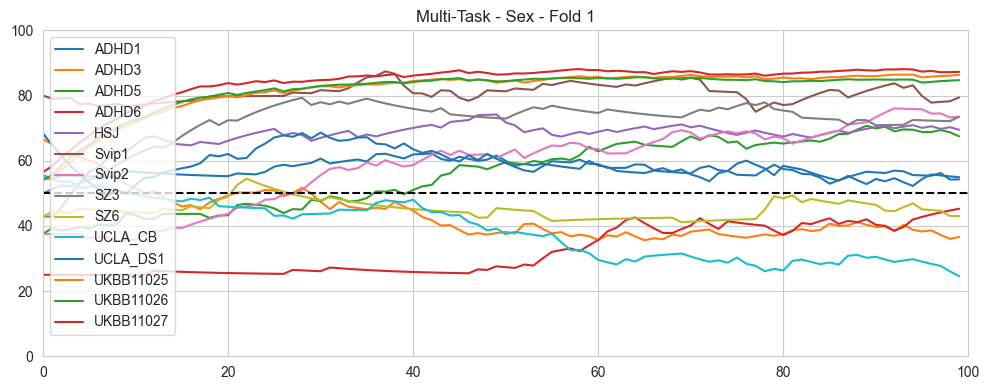

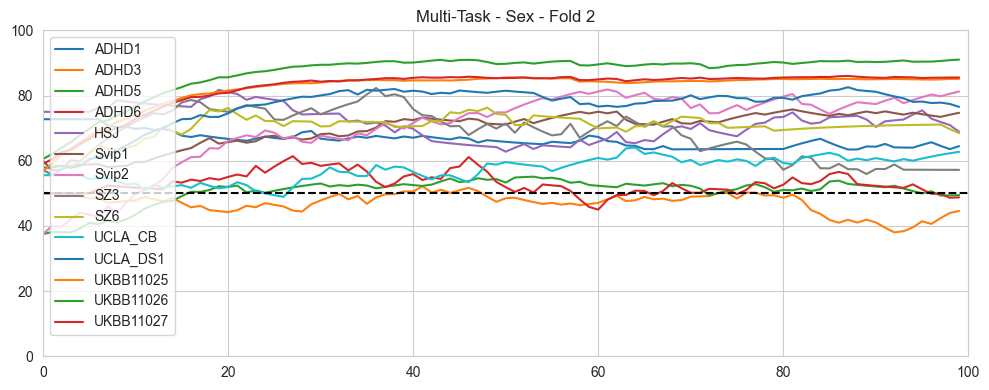

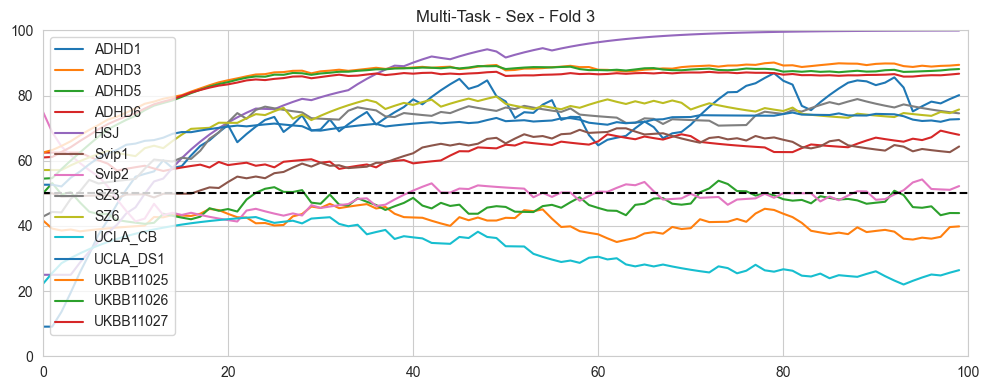

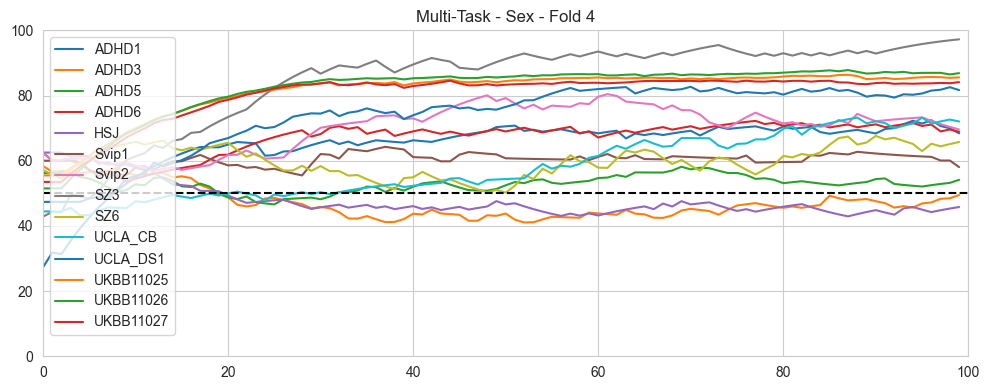

In [15]:
for i,df in enumerate(folds):
    plt.figure(figsize=(10,4))
    for site in sites:
        sns.lineplot(x=df.index,y=smooth(df[site]['Accuracy/test']),data=df[site],label=site)
    plt.title(f'Multi-Task - Sex - Fold {i}')

    plt.xlim(0,100)
    plt.ylim(0,100)
    plt.legend(loc="upper left")
    plt.hlines(50,-5,105,ls='--',color='black')
    plt.tight_layout()
    plt.savefig(os.path.join(p_out_parent,f'figures/all_fold{i}.png'))
    plt.show()